In [35]:
import pandas as pd

def load_csv_from_url(url: str) -> pd.DataFrame:
    """
    Загружает CSV-файл по прямой ссылке и возвращает DataFrame.
    """
    try:
        df = pd.read_csv(url)
        print("✅ Данные успешно загружены.\n")
        print(df.head())  # Выводим первые строки
        return df
    except Exception as e:
        print(f"❌ Ошибка при загрузке данных: {e}")
        return None

# Вызов функции с нужной ссылкой
url = "https://dano.hse.ru/mirror/pubs/share/987942868.csv"
df = load_csv_from_url(url)


✅ Данные успешно загружены.

   customer_id   age gender_cd region_size  foreign_flg  entrepreneur_flg  \
0    422206773  58.0         F         NaN          NaN               NaN   
1    348648289  44.0         M       rural          0.0               0.0   
2    345496995  23.0         F        town          0.0               0.0   
3    182783192  34.0         M        town          0.0               0.0   
4    138498254  30.0         M         NaN          NaN               NaN   

   auto_flg  traveler_flg  partnership_flg  child_amt  ...  \
0       NaN           NaN              NaN        NaN  ...   
1       0.0           0.0              1.0        1.0  ...   
2       1.0           0.0              1.0        0.0  ...   
3       0.0           0.0              0.0        0.0  ...   
4       NaN           NaN              NaN        NaN  ...   

  state_talk_time_sec wo_hit_status_result_desc  \
0                67.0             Дозвон, Отказ   
1               151.0            

In [14]:
print(df.sample(10))

       customer_id   age gender_cd region_size  foreign_flg  entrepreneur_flg  \
3826     391853140  29.0         F         NaN          NaN               NaN   
9277     295362301  38.0         M         NaN          NaN               NaN   
1327     471362673  71.0         F         msk          0.0               1.0   
5402     500162224  40.0         F        town          0.0               0.0   
5172     174793520  29.0         M       urban          0.0               0.0   
5753     160678847  25.0         M       urban          0.0               1.0   
10898    505216398  25.0         M        town          0.0               0.0   
8954     526359769  35.0         F         msk          0.0               0.0   
2414     191634796  35.0         M        town          0.0               0.0   
1015     172484413  35.0         M         NaN          NaN               NaN   

       auto_flg  traveler_flg  partnership_flg  child_amt  ...  \
3826        NaN           NaN             

In [36]:
print(df.dtypes)

customer_id                     int64
age                            object
gender_cd                      object
region_size                    object
foreign_flg                   float64
entrepreneur_flg              float64
auto_flg                      float64
traveler_flg                  float64
partnership_flg               float64
child_amt                     float64
realty_type                    object
segment_cd                     object
bundle_nm                      object
confirmed_income              float64
predicted_income              float64
product_cd                     object
functional_cd                  object
finish_dttm                    object
state_talk_time_sec           float64
wo_hit_status_result_desc      object
wo_hit_status_reason_desc      object
employee_id                   float64
emp_age                         int64
emp_gender_cd                  object
emp_children_cnt              float64
emp_work_months_cnt             int64
emp_citizens

In [37]:
def clean_column_types(df: pd.DataFrame) -> pd.DataFrame:
    """
    Приводит данные к корректным типам:
    - age и employee_id → pandas Int64 (с поддержкой NaN)
    - finish_dttm → datetime
    """
    df = df.copy()

    # Преобразование age
    df['age'] = pd.to_numeric(df['age'], errors='coerce').round().astype('Int64')

    # Преобразование employee_id (предварительно убираем точки)
    df['employee_id'] = pd.to_numeric(df['employee_id'], errors='coerce').round().astype('Int64')

    # Преобразование finish_dttm в datetime
    df['finish_dttm'] = pd.to_datetime(df['finish_dttm'], errors='coerce')

    print("✅ Типы колонок обновлены.\n")
    print(df.dtypes)
    
    return df

# Вызов функции
df = clean_column_types(df)


✅ Типы колонок обновлены.

customer_id                            int64
age                                    Int64
gender_cd                             object
region_size                           object
foreign_flg                          float64
entrepreneur_flg                     float64
auto_flg                             float64
traveler_flg                         float64
partnership_flg                      float64
child_amt                            float64
realty_type                           object
segment_cd                            object
bundle_nm                             object
confirmed_income                     float64
predicted_income                     float64
product_cd                            object
functional_cd                         object
finish_dttm                   datetime64[ns]
state_talk_time_sec                  float64
wo_hit_status_result_desc             object
wo_hit_status_reason_desc             object
employee_id                 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 18691 non-null  int64         
 1   age                         18508 non-null  Int64         
 2   gender_cd                   18433 non-null  object        
 3   region_size                 11402 non-null  object        
 4   foreign_flg                 11402 non-null  float64       
 5   entrepreneur_flg            11402 non-null  float64       
 6   auto_flg                    11402 non-null  float64       
 7   traveler_flg                11402 non-null  float64       
 8   partnership_flg             11402 non-null  float64       
 9   child_amt                   11402 non-null  float64       
 10  realty_type                 11402 non-null  object        
 11  segment_cd                  11402 non-null  object    

Полных строк: 11402
Неполных строк: 7289

Числовой столбец: age
Группа 1:
count      11367.0
mean      36.66086
std      11.777901
min           13.0
25%           28.0
50%           36.0
75%           44.0
max           83.0
Name: age, dtype: Float64
Группа 2:
count       7141.0
mean     40.219297
std       13.05082
min            8.0
25%           31.0
50%           39.0
75%           49.0
max           85.0
Name: age, dtype: Float64
t-тест: p-value = 0.0000

Числовой столбец: predicted_income
Группа 1:
count      3235.000000
mean      16892.313614
std        6361.623295
min        7823.500000
25%       12938.100000
50%       15323.500000
75%       18600.460000
max      107823.500000
Name: predicted_income, dtype: float64
Группа 2:
count    8.520000e+02
mean     3.449241e+07
std      1.006370e+09
min     -6.274500e+03
25%      1.232350e+04
50%      1.387153e+04
75%      1.595927e+04
max      2.937498e+10
Name: predicted_income, dtype: float64
t-тест: p-value = 0.3176

Числовой столбе

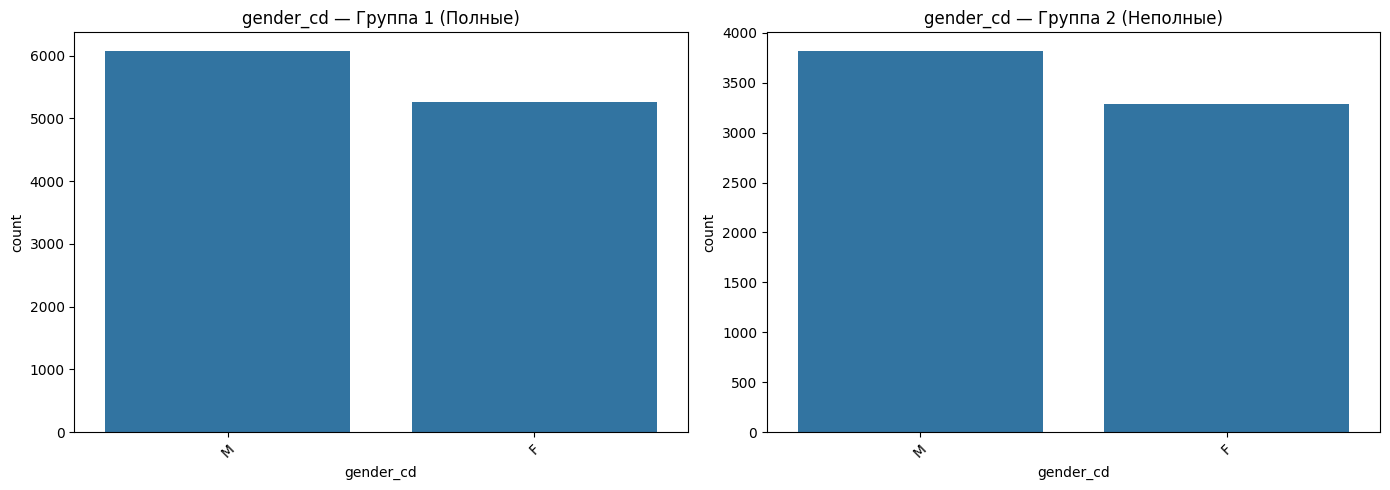

✅ Chi²-тест по gender_cd: p-value = 0.8552

Категориальный столбец: region_size
             Группа 1  Группа 2
region_size                    
town         0.530959       0.0
urban        0.233380       0.0
msk          0.136730       0.0
rural        0.098930       0.0


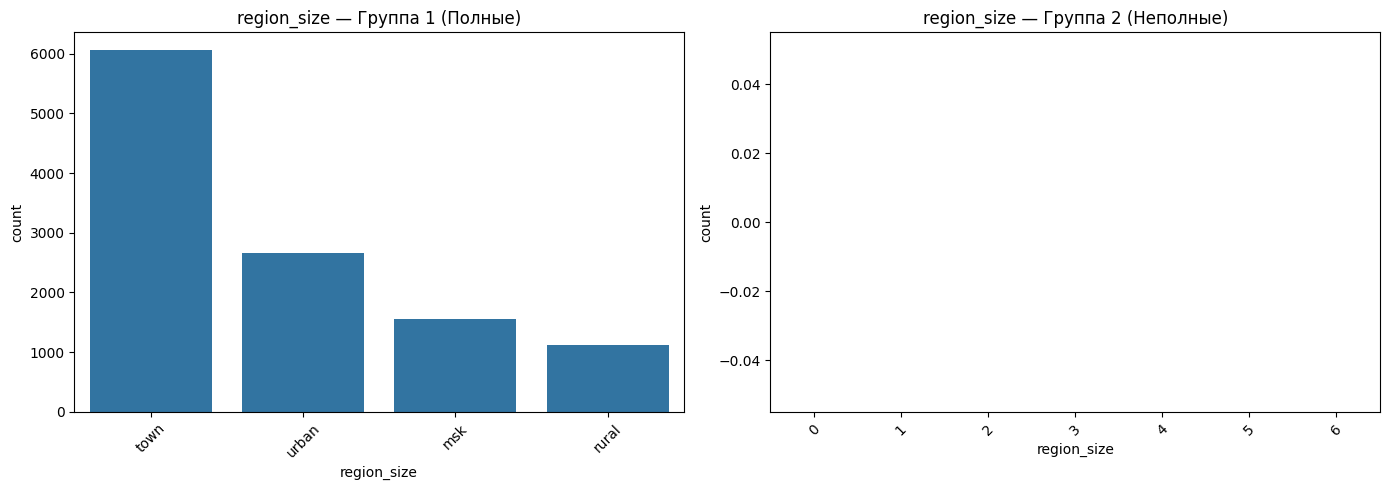

✅ Chi²-тест по region_size: p-value = 1.0000

Категориальный столбец: realty_type
                  Группа 1  Группа 2
realty_type                         
Квартира          0.502631       0.0
Нет своего жилья  0.477548       0.0
Жилой дом         0.011402       0.0
Комната           0.008420       0.0


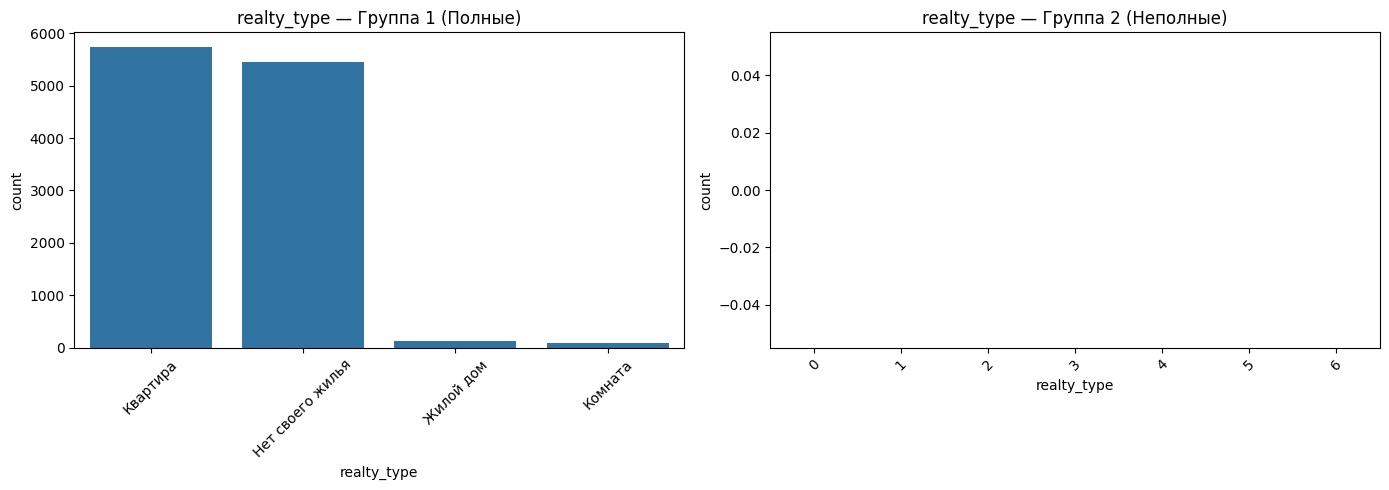

✅ Chi²-тест по realty_type: p-value = 1.0000

Категориальный столбец: functional_cd
               Группа 1  Группа 2
functional_cd                    
Preapprove     0.450886  0.532858
Afterfilling   0.144273  0.096995
Utilization    0.095773  0.085746
Upsell         0.091300  0.041295
Cold           0.063410  0.111675
Meeting        0.049904  0.067911
Agreement      0.037713  0.016052
Incoming       0.017453  0.022225
Reutilization  0.016751  0.005076
Downsell       0.013419  0.010427
Activation     0.007806  0.000960
Autoleads      0.004034  0.000137
Prolongation   0.003508  0.001235
BAF            0.002807  0.007271
Deposit        0.000877  0.000137
Refinancing    0.000088  0.000000


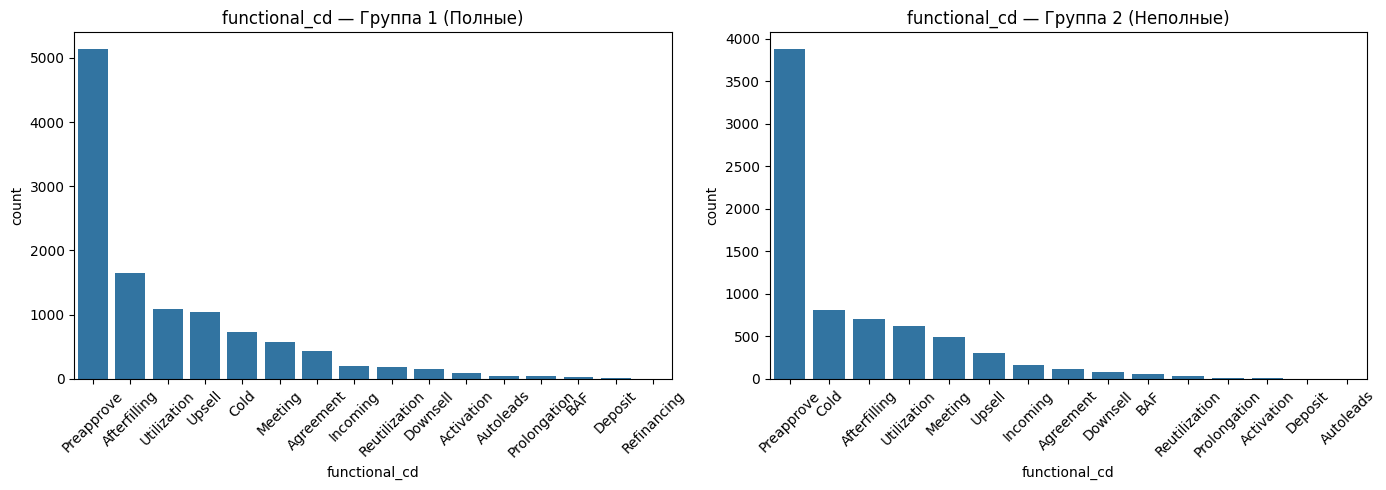

✅ Chi²-тест по functional_cd: p-value = 0.0000

Категориальный столбец: wo_hit_status_result_desc
                           Группа 1  Группа 2
wo_hit_status_result_desc                    
Дозвон, Отказ              0.860902  0.885993
Дозвон, Успешно            0.139098  0.114007


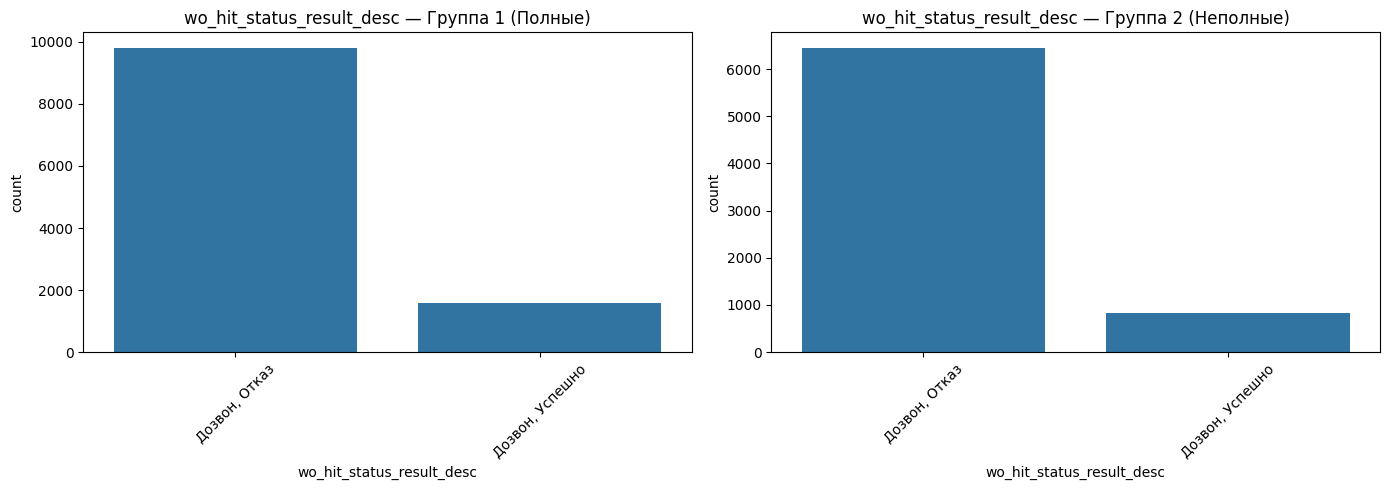

✅ Chi²-тест по wo_hit_status_result_desc: p-value = 0.0000


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency

def split_by_completeness(df):
    key_fields = [
        'region_size', 'foreign_flg', 'auto_flg', 'traveler_flg',
        'partnership_flg', 'child_amt', 'realty_type', 'segment_cd'
    ]
    full_mask = df[key_fields].notnull().all(axis=1)
    df_full = df[full_mask].copy()
    df_partial = df[~full_mask].copy()

    print(f"Полных строк: {len(df_full)}")
    print(f"Неполных строк: {len(df_partial)}")

    return df_full, df_partial

def compare_numeric_stats(df1, df2, numeric_cols):
    for col in numeric_cols:
        print(f"\nЧисловой столбец: {col}")
        print("Группа 1:")
        print(df1[col].describe())
        print("Группа 2:")
        print(df2[col].describe())

        a = df1[col].dropna()
        b = df2[col].dropna()
        if len(a) > 10 and len(b) > 10:
            stat, p = ttest_ind(a, b, equal_var=False)
            print(f"t-тест: p-value = {p:.4f}")
        else:
            print("Недостаточно данных для t-теста.")

def compare_categorical_stats(df1, df2, cat_cols):
    for col in cat_cols:
        print(f"\nКатегориальный столбец: {col}")

        ctab1 = df1[col].value_counts(normalize=True)
        ctab2 = df2[col].value_counts(normalize=True)
        compare_df = pd.concat([ctab1, ctab2], axis=1, keys=['Группа 1', 'Группа 2'])
        print(compare_df.fillna(0))

        # Визуализация
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        sns.countplot(data=df1, x=col, ax=ax[0], order=df1[col].value_counts().index)
        ax[0].set_title(f'{col} — Группа 1 (Полные)')
        ax[0].tick_params(axis='x', rotation=45)

        sns.countplot(data=df2, x=col, ax=ax[1], order=df2[col].value_counts().index)
        ax[1].set_title(f'{col} — Группа 2 (Неполные)')
        ax[1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

        # Chi² тест
        combined = pd.concat([
            df1[[col]].assign(group='Группа 1'),
            df2[[col]].assign(group='Группа 2')
        ])
        contingency = pd.crosstab(combined['group'], combined[col])

        # Удалим колонки, где хотя бы одна строка = 0
        contingency = contingency.loc[:, (contingency != 0).all(axis=0)]

        if contingency.shape[1] > 1:
            chi2, p, _, _ = chi2_contingency(contingency)
            print(f"✅ Chi²-тест по {col}: p-value = {p:.4f}")
        else:
            print("❌ Недостаточно общих категорий для chi²-теста.")

# --- Вызов ---
df_full, df_partial = split_by_completeness(df)

numeric_columns = ['age', 'predicted_income', 'state_talk_time_sec']
categorical_columns = ['gender_cd', 'region_size', 'realty_type', 'functional_cd', 'wo_hit_status_result_desc']

# Сравнение
compare_numeric_stats(df_full, df_partial, numeric_columns)
compare_categorical_stats(df_full, df_partial, categorical_columns)

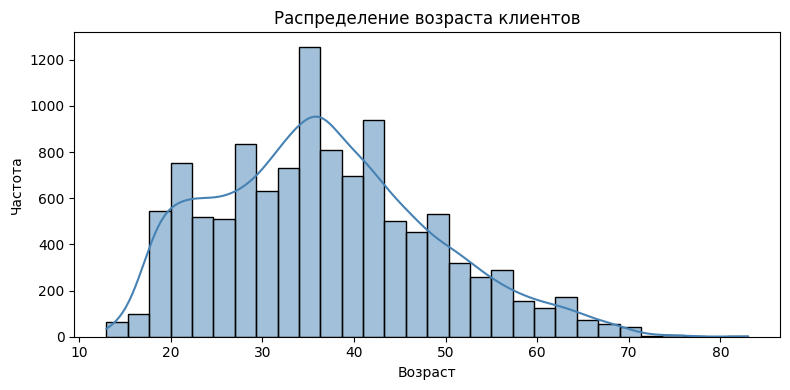

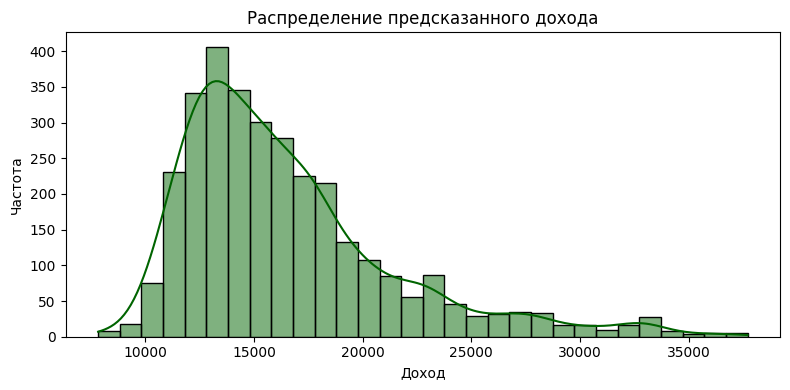

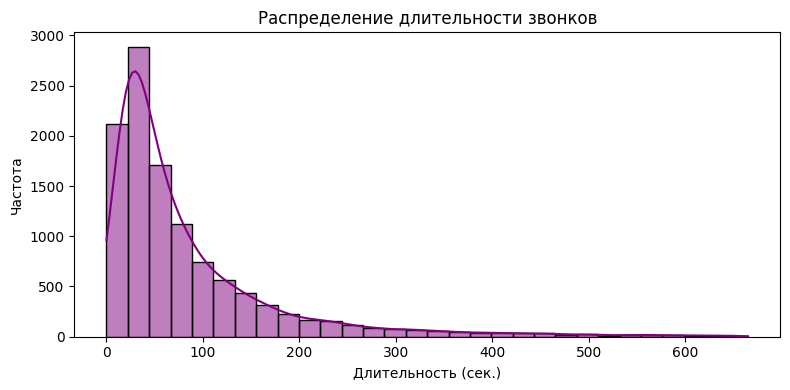

In [56]:
def plot_age_distribution(df):
    """
    Гистограмма и KDE-плотность по возрасту клиентов
    """
    plt.figure(figsize=(8, 4))
    sns.histplot(df['age'].dropna(), bins=30, kde=True, color='steelblue')
    plt.title('Распределение возраста клиентов')
    plt.xlabel('Возраст')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

def plot_predicted_income(df):
    """
    Распределение предсказанного дохода (без выбросов)
    """
    data = df['predicted_income'].dropna()
    data = data[data < data.quantile(0.99)]  # уберём верхние 1% как выбросы

    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=30, kde=True, color='darkgreen')
    plt.title('Распределение предсказанного дохода')
    plt.xlabel('Доход')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

def plot_talk_time(df):
    """
    Распределение длительности звонков (в секундах)
    """
    data = df['state_talk_time_sec'].dropna()
    data = data[data < data.quantile(0.99)]  # убираем выбросы

    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=30, kde=True, color='purple')
    plt.title('Распределение длительности звонков')
    plt.xlabel('Длительность (сек.)')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

plot_age_distribution(df_full)
plot_predicted_income(df_full)
plot_talk_time(df_full)



📊 Доля успешных холодных звонков по регионам:
region_size
urban    0.135870
msk      0.125000
town     0.122137
rural    0.108108
Name: success, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\3841839115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cold_df['success'] = cold_df['wo_hit_status_result_desc'].str.contains('Успешно', case=False)


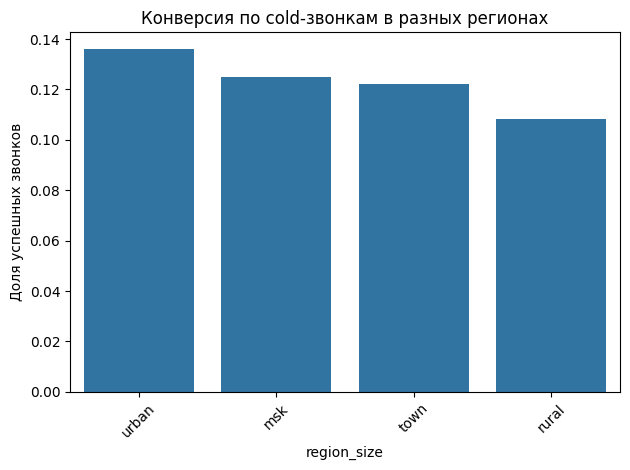


📊 Конверсия Upsell по группам (богатые / остальные):
group
Богатые      0.067308
Остальные    0.077908
Name: success, dtype: float64


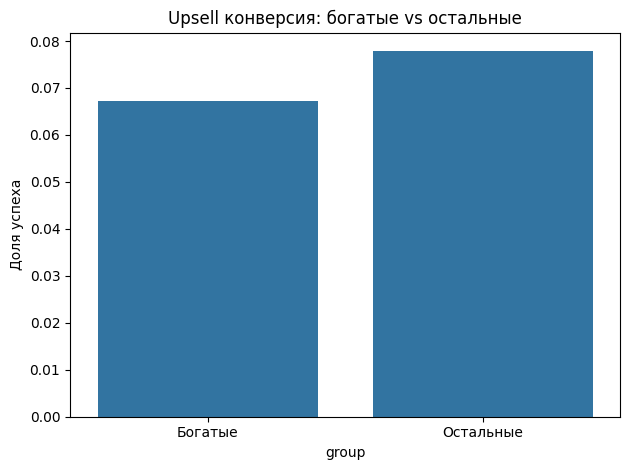

In [40]:
def analyze_cold_calls_by_region(df):
    """
    Сравнивает долю успеха по холодным звонкам в Москве и других регионах.
    """
    cold_df = df[df['functional_cd'] == 'Cold']
    cold_df['success'] = cold_df['wo_hit_status_result_desc'].str.contains('Успешно', case=False)

    region_grouped = cold_df.groupby('region_size')['success'].mean().sort_values(ascending=False)
    print("\n📊 Доля успешных холодных звонков по регионам:")
    print(region_grouped)

    sns.barplot(x=region_grouped.index, y=region_grouped.values)
    plt.title("Конверсия по cold-звонкам в разных регионах")
    plt.ylabel("Доля успешных звонков")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def analyze_upsell_for_rich_clients(df):
    """
    Сравнивает успех звонков Upsell у 'богатых' и остальных.
    """
    # Критерии "богатства"
    rich_mask = (
        (df['realty_type'] == 'Квартира') &
        (df['auto_flg'] == 1.0) &
        (df['region_size'].isin(['urban', 'msk']))
    )

    upsell_df = df[df['functional_cd'] == 'Upsell'].copy()
    upsell_df['success'] = upsell_df['wo_hit_status_result_desc'].str.contains('Успешно', case=False)
    upsell_df['group'] = np.where(rich_mask.loc[upsell_df.index], 'Богатые', 'Остальные')

    result = upsell_df.groupby('group')['success'].mean()
    print("\n📊 Конверсия Upsell по группам (богатые / остальные):")
    print(result)

    sns.barplot(x=result.index, y=result.values)
    plt.title("Upsell конверсия: богатые vs остальные")
    plt.ylabel("Доля успеха")
    plt.tight_layout()
    plt.show()

analyze_cold_calls_by_region(df_full)
analyze_upsell_for_rich_clients(df_full)



📊 Доля успешных холодных звонков по регионам:
region_size
urban    0.135870
msk      0.125000
town     0.122137
rural    0.108108
Name: success, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\703146630.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_grouped.index, y=region_grouped.values, palette="coolwarm")


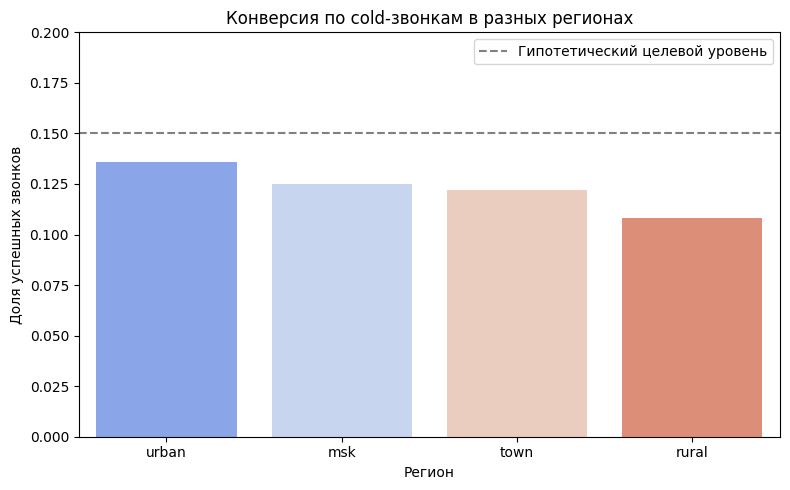


📊 Конверсия Upsell по группам (богатые / остальные):
group
Богатые      0.067308
Остальные    0.077908
Name: success, dtype: float64


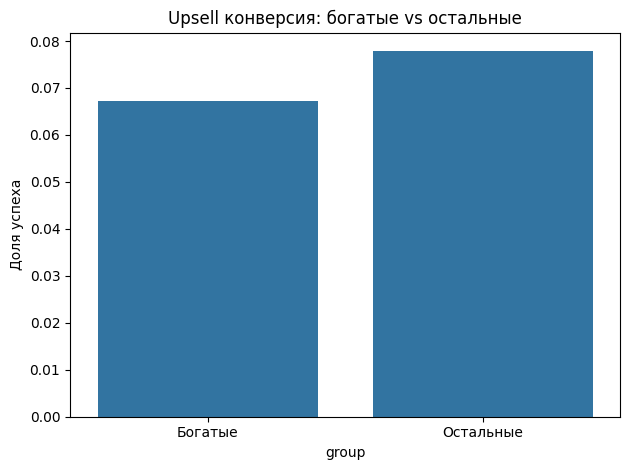

In [25]:
def analyze_cold_calls_by_region(df):
    """
    Сравнивает долю успеха по холодным звонкам в Москве и других регионах.
    Показывает потенциал для улучшения.
    """
    cold_df = df[df['functional_cd'] == 'Cold'].copy()  # Копируем явно
    cold_df['success'] = cold_df['wo_hit_status_result_desc'].str.contains('Успешно', case=False, na=False)

    region_grouped = cold_df.groupby('region_size')['success'].mean().sort_values(ascending=False)
    print("\n📊 Доля успешных холодных звонков по регионам:")
    print(region_grouped)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=region_grouped.index, y=region_grouped.values, palette="coolwarm")
    plt.title("Конверсия по cold-звонкам в разных регионах")
    plt.ylabel("Доля успешных звонков")
    plt.xlabel("Регион")
    plt.ylim(0, 0.2)
    plt.axhline(0.15, color='gray', linestyle='--', label='Гипотетический целевой уровень')
    plt.legend()
    plt.tight_layout()
    plt.show()

analyze_cold_calls_by_region(df_full)
analyze_upsell_for_rich_clients(df_full)

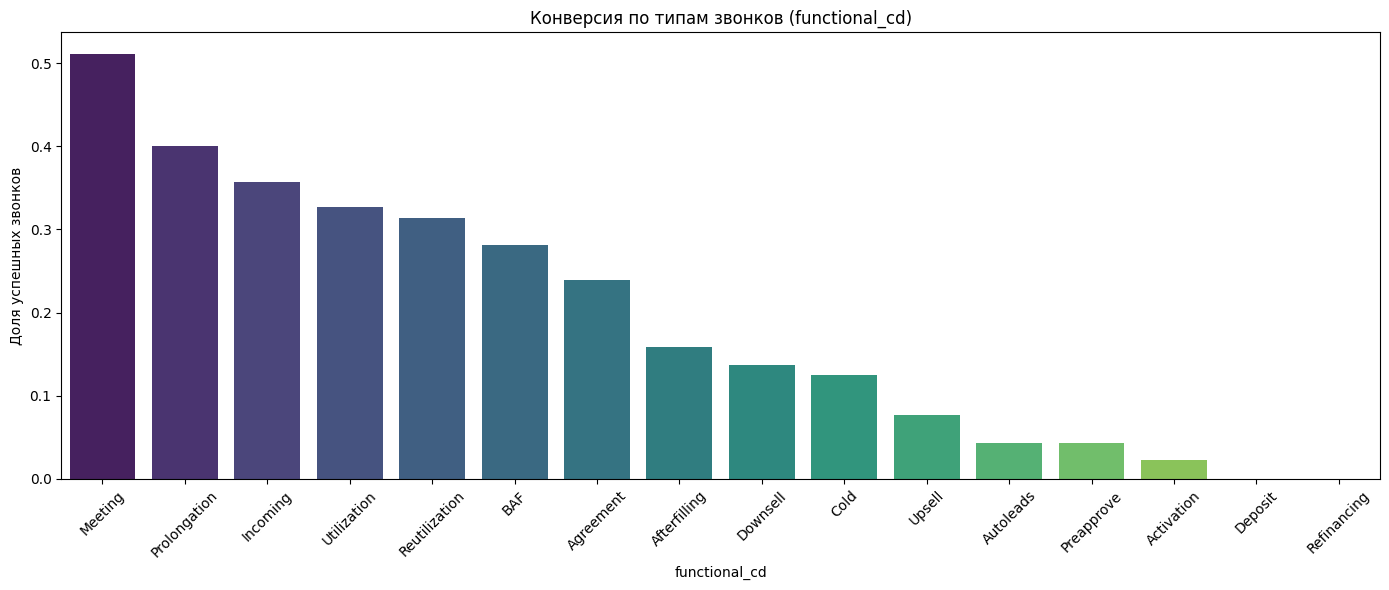

In [41]:
def plot_call_type_success(df):
    """
    Показывает долю успешных звонков по всем типам звонков (functional_cd).
    """
    df = df.copy()
    df['success'] = df['wo_hit_status_result_desc'].str.contains('Успешно', case=False, na=False)

    grouped = df.groupby('functional_cd')['success'].mean().sort_values(ascending=False)

    plt.figure(figsize=(14, 6))
    sns.barplot(x=grouped.index, y=grouped.values, hue=grouped.index, dodge=False, legend=False, palette="viridis")
    plt.title("Конверсия по типам звонков (functional_cd)")
    plt.ylabel("Доля успешных звонков")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_call_type_success(df_full)



📊 Конверсия Autoleads по: Тип недвижимости
realty_type
Жилой дом           0.333333
Квартира            0.000000
Нет своего жилья    0.058824
Name: success, dtype: float64


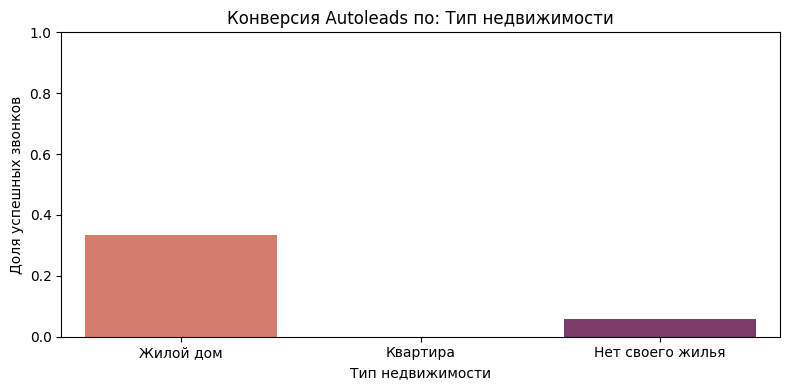


📊 Конверсия Autoleads по: Регион
region_size
msk      0.000000
rural    0.000000
town     0.076923
urban    0.000000
Name: success, dtype: float64


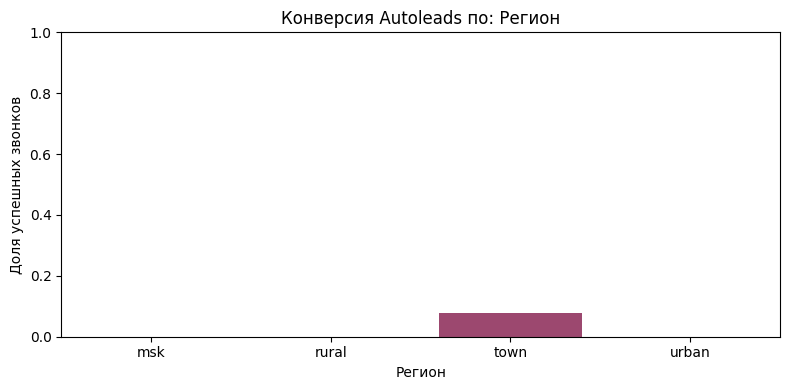


📊 Конверсия Autoleads по: Наличие авто
auto_flg
0.0    0.050000
1.0    0.038462
Name: success, dtype: float64


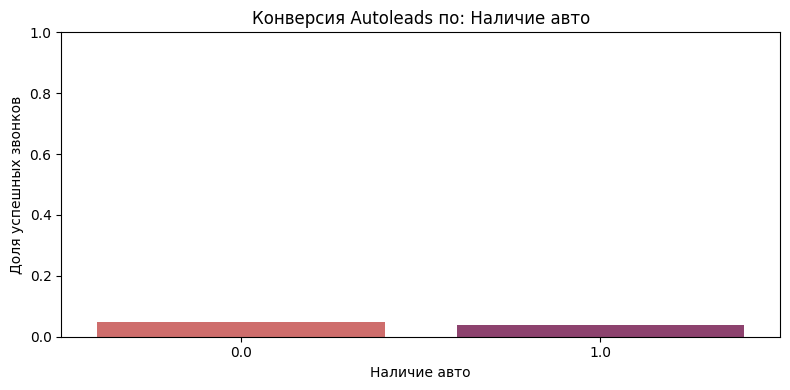


📊 Конверсия Autoleads по: Возрастная группа
age_group
<25      0.166667
25–35    0.000000
36–50    0.045455
51–65    0.000000
65+      0.000000
Name: success, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\2119024388.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = auto_df.groupby(col)['success'].mean()


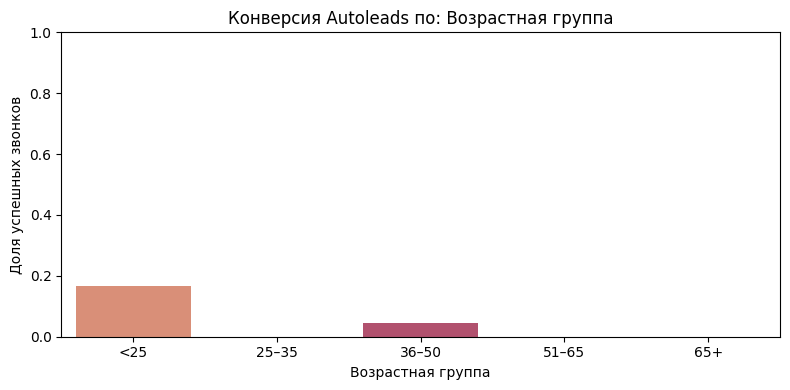

In [46]:
def analyze_autoleads_response(df):
    """
    Анализирует отклик на звонки с целью Autoleads по:
    - типу недвижимости
    - региону
    - наличию автомобиля
    - возрастным группам
    """
    df = df.copy()
    auto_df = df[df['functional_cd'] == 'Autoleads'].copy()

    # Проверка наличия таких звонков
    if auto_df.empty:
        print("❌ Нет звонков с типом 'Autoleads' в данных.")
        return

    # Отметка успеха
    auto_df.loc[:, 'success'] = auto_df['wo_hit_status_result_desc'].str.contains('Успешно', case=False, na=False)

    # Проверка на успешность
    if auto_df['success'].sum() == 0:
        print("⚠️ Ни одного успешного звонка с целью 'Autoleads' не найдено.")
        return

    # Возрастные группы
    bins = [0, 25, 35, 50, 65, 100]
    labels = ['<25', '25–35', '36–50', '51–65', '65+']
    auto_df.loc[:, 'age_group'] = pd.cut(auto_df['age'], bins=bins, labels=labels)

    # Характеристики для анализа
    features = {
        'realty_type': 'Тип недвижимости',
        'region_size': 'Регион',
        'auto_flg': 'Наличие авто',
        'age_group': 'Возрастная группа'
    }

    for col, title in features.items():
        grouped = auto_df.groupby(col)['success'].mean()

        print(f"\n📊 Конверсия Autoleads по: {title}")
        print(grouped)

        plt.figure(figsize=(8, 4))
        sns.barplot(x=grouped.index.astype(str), y=grouped.values, hue=grouped.index, palette='flare', legend=False)
        plt.title(f'Конверсия Autoleads по: {title}')
        plt.ylabel('Доля успешных звонков')
        plt.xlabel(title)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

analyze_autoleads_response(df_full)
        


In [48]:
def count_upsell_calls(df):
    """
    Считает общее количество звонков с целью Upsell
    и сколько из них были успешными.
    """
    upsell_df = df[df['functional_cd'] == 'Upsell'].copy()
    total = len(upsell_df)
    successful = upsell_df['wo_hit_status_result_desc'].str.contains('Успешно', case=False, na=False).sum()

    print(f"📞 Всего звонков с Upsell: {total}")
    print(f"✅ Успешных звонков: {successful}")
    if total > 0:
        print(f"🎯 Конверсия: {successful / total:.2%}")
    else:
        print("⚠️ Звонков с Upsell в данных нет.")

count_upsell_calls(df_full)


📞 Всего звонков с Upsell: 1041
✅ Успешных звонков: 80
🎯 Конверсия: 7.68%


In [49]:
def count_cold_calls(df):
    """
    Считает общее количество звонков с целью Cold
    и сколько из них были успешными.
    """
    cold_df = df[df['functional_cd'] == 'Cold'].copy()
    total = len(cold_df)
    successful = cold_df['wo_hit_status_result_desc'].str.contains('Успешно', case=False, na=False).sum()

    print(f"📞 Всего звонков с Cold: {total}")
    print(f"✅ Успешных звонков: {successful}")
    if total > 0:
        print(f"🎯 Конверсия: {successful / total:.2%}")
    else:
        print("⚠️ Звонков с Cold в данных нет.")

count_cold_calls(df_full)


📞 Всего звонков с Cold: 723
✅ Успешных звонков: 90
🎯 Конверсия: 12.45%



📊 Конверсия Upsell по: Тип недвижимости
realty_type
Жилой дом           0.166667
Квартира            0.073529
Комната             0.166667
Нет своего жилья    0.076782
Name: success, dtype: float64


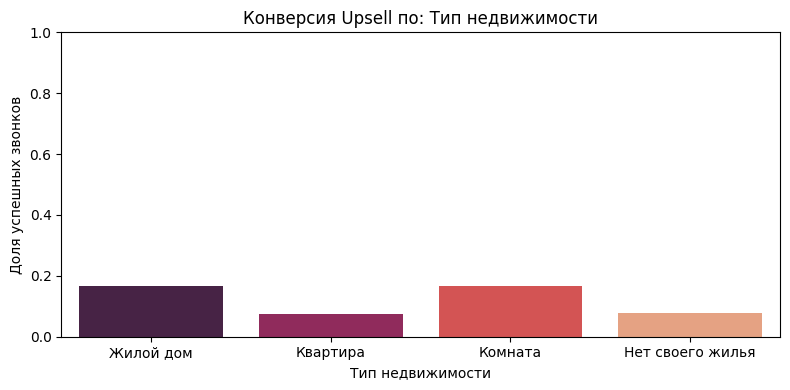


📊 Конверсия Upsell по: Регион
region_size
msk      0.087379
rural    0.094203
town     0.081034
urban    0.050000
Name: success, dtype: float64


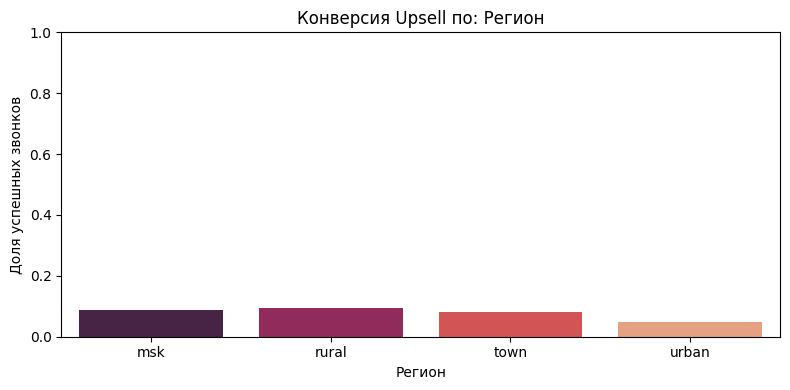


📊 Конверсия Upsell по: Наличие авто
auto_flg
0.0    0.090517
1.0    0.065858
Name: success, dtype: float64


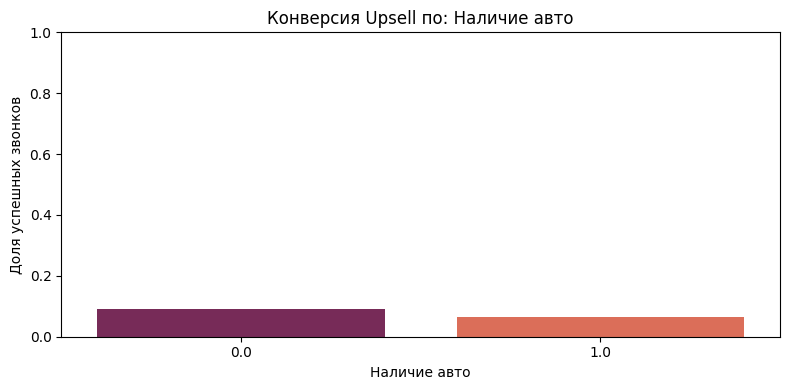


📊 Конверсия Upsell по: Возрастная группа
age_group
<25      0.063025
25–35    0.071795
36–50    0.084848
51–65    0.113924
65+      0.000000
Name: success, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\2725422141.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = upsell_df.groupby(col)['success'].mean()


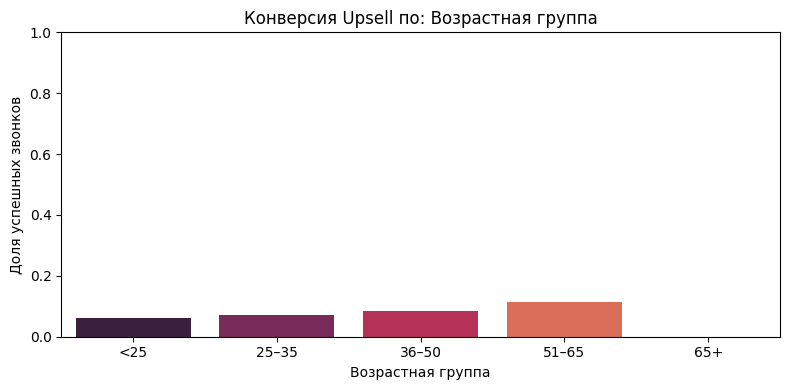

In [50]:
def analyze_upsell_response(df):
    """
    Анализирует отклик на звонки с целью Upsell по:
    - типу недвижимости
    - региону
    - наличию автомобиля
    - возрастным группам
    """
    df = df.copy()
    upsell_df = df[df['functional_cd'] == 'Upsell'].copy()

    if upsell_df.empty:
        print("❌ Нет звонков с типом 'Upsell'.")
        return

    upsell_df.loc[:, 'success'] = upsell_df['wo_hit_status_result_desc'].str.contains('Успешно', case=False, na=False)

    if upsell_df['success'].sum() == 0:
        print("⚠️ Нет успешных звонков по Upsell.")
        return

    # Возрастные группы
    bins = [0, 25, 35, 50, 65, 100]
    labels = ['<25', '25–35', '36–50', '51–65', '65+']
    upsell_df.loc[:, 'age_group'] = pd.cut(upsell_df['age'], bins=bins, labels=labels)

    # Признаки
    features = {
        'realty_type': 'Тип недвижимости',
        'region_size': 'Регион',
        'auto_flg': 'Наличие авто',
        'age_group': 'Возрастная группа'
    }

    for col, title in features.items():
        grouped = upsell_df.groupby(col)['success'].mean()

        print(f"\n📊 Конверсия Upsell по: {title}")
        print(grouped)

        plt.figure(figsize=(8, 4))
        sns.barplot(x=grouped.index.astype(str), y=grouped.values, hue=grouped.index, palette='rocket', legend=False)
        plt.title(f'Конверсия Upsell по: {title}')
        plt.ylabel('Доля успешных звонков')
        plt.xlabel(title)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

analyze_upsell_response(df_full)


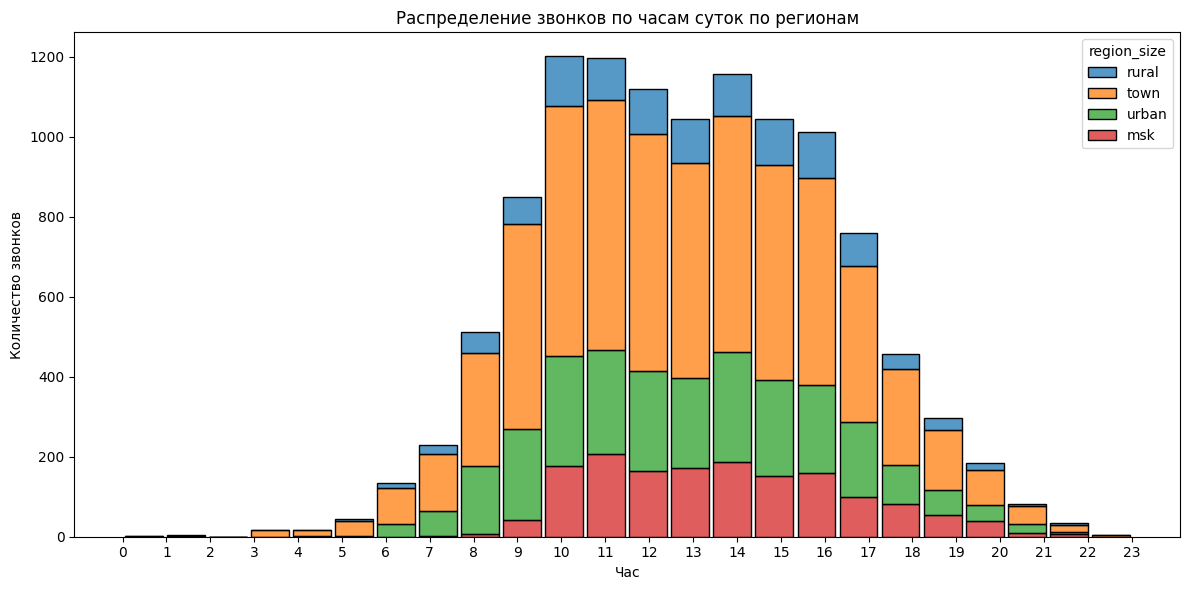

In [52]:
def plot_calls_by_hour_and_region(df):
    """
    Строит распределение звонков по часам суток и регионам
    Позволяет оценить, локальное ли время
    """
    df = df.copy()
    df['hour'] = df['finish_dttm'].dt.hour

    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='hour', hue='region_size', multiple='stack', bins=24, shrink=0.9)
    plt.title("Распределение звонков по часам суток по регионам")
    plt.xlabel("Час")
    plt.ylabel("Количество звонков")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()

plot_calls_by_hour_and_region(df_full)


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\1663228736.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


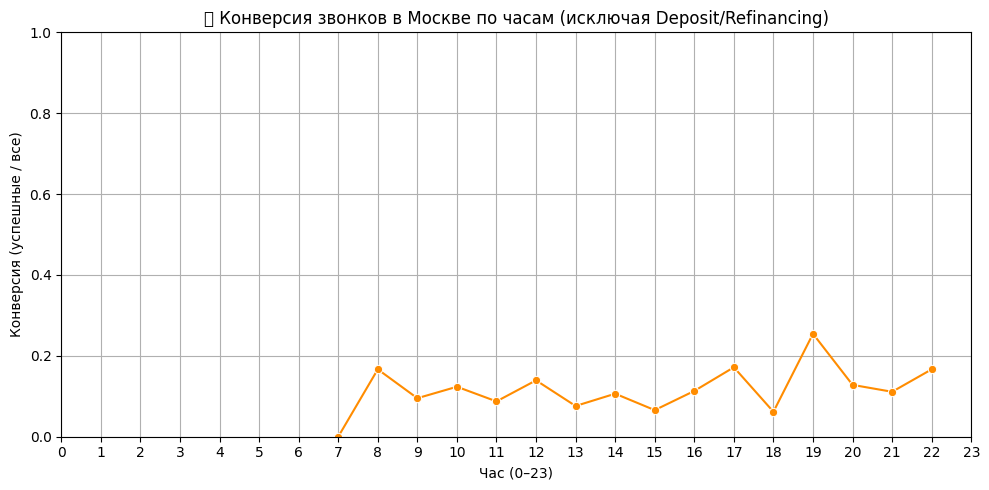

      count  sum  conversion
hour                        
7         3    0    0.000000
8         6    1    0.166667
9        42    4    0.095238
10      178   22    0.123596
11      206   18    0.087379
12      165   23    0.139394
13      171   13    0.076023
14      188   20    0.106383
15      152   10    0.065789
16      159   18    0.113208
17       99   17    0.171717
18       81    5    0.061728
19       55   14    0.254545
20       39    5    0.128205
21        9    1    0.111111
22        6    1    0.166667


In [54]:
def plot_msk_conversion_by_hour(df):
    """
    Показывает конверсию по часам суток в Москве
    для всех типов звонков, кроме Deposit и Refinancing
    """
    df = df.copy()

    excluded = ['Deposit', 'Refinancing']
    df = df[(df['region_size'] == 'msk') & (~df['functional_cd'].isin(excluded))]

    # Метка успеха
    df['success'] = df['wo_hit_status_result_desc'].str.contains('Успешно', case=False, na=False)
    df['hour'] = df['finish_dttm'].dt.hour

    # Конверсия по часам
    hourly_stats = df.groupby('hour')['success'].agg(['count', 'sum'])
    hourly_stats['conversion'] = hourly_stats['sum'] / hourly_stats['count']

    # График
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=hourly_stats.index, y=hourly_stats['conversion'], marker='o', color='darkorange')
    plt.title("📊 Конверсия звонков в Москве по часам (исключая Deposit/Refinancing)")
    plt.xlabel("Час (0–23)")
    plt.ylabel("Конверсия (успешные / все)")
    plt.xticks(range(0, 24))
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(hourly_stats[['count', 'sum', 'conversion']])

plot_msk_conversion_by_hour(df_full)


In [55]:
from statsmodels.stats.proportion import proportions_ztest

def compare_conversion_hours(df, h1, h2):
    """
    Сравнивает конверсию между двумя часами с помощью Z-теста
    """
    df = df.copy()
    df = df[df['region_size'] == 'msk']
    df = df[~df['functional_cd'].isin(['Deposit', 'Refinancing'])]

    df['success'] = df['wo_hit_status_result_desc'].str.contains('Успешно', case=False, na=False)
    df['hour'] = df['finish_dttm'].dt.hour

    conv1 = df[df['hour'] == h1]['success']
    conv2 = df[df['hour'] == h2]['success']

    success = [conv1.sum(), conv2.sum()]
    nobs = [conv1.count(), conv2.count()]

    stat, pval = proportions_ztest(success, nobs)

    print(f"📊 Сравнение конверсии: {h1}:00 vs {h2}:00")
    print(f"Успешные: {success}")
    print(f"Всего звонков: {nobs}")
    print(f"Z-статистика = {stat:.4f}, p-value = {pval:.4f}")

    if pval < 0.05:
        print("✅ Различие статистически значимо (p < 0.05)")
    else:
        print("⚠️ Различие НЕ значимо (p >= 0.05)")

compare_conversion_hours(df_full, 18, 19)


📊 Сравнение конверсии: 18:00 vs 19:00
Успешные: [np.int64(5), np.int64(14)]
Всего звонков: [np.int64(81), np.int64(55)]
Z-статистика = -3.1832, p-value = 0.0015
✅ Различие статистически значимо (p < 0.05)


In [57]:
print(df['wo_hit_status_result_desc'].str.contains('Успешно').sum() / len(df))

0.12931357337756139
